# Problem Set 1, due Jan 27 at 11:59pm 

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:      7.11.1 (need at least 1.0)
Numpy version:        1.18.1 (need at least 1.7.1)
SciPy version:         1.3.1 (need at least 0.12.0)
Pandas version:       0.25.3 (need at least 0.11.0)
Maplotlib version:     3.1.1 (need at least 1.2.1)
Scikit-Learn version: 0.22.1 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to f

In [4]:
boston = pd.DataFrame(bdata.data)

In [5]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
# 1.1.1 shape of boston dataframe
print(boston.shape)

# 1.1.2 count of neighborhoods where tract bounds Charles River
print(boston['CHAS'].value_counts())

# 1.1.3 detect any missing values
print(boston.isnull().sum())

# 1.1.4 display property tax rate of 5 neighborhoods with highest median housing price
boston['MEDV'] = bdata.target # add new column 'MEDV'
highest_5 = boston.sort_values(by = ['MEDV'], ascending = False).head(5)
highest_5['TAX']

# alternatively
# target = pd.DataFrame(bdata.target, columns=['MEDV'])
# highest_5 = pd.DataFrame.sort_values(target, by = 'MEDV', ascending = False).head(5)
# print(highest_5.index)
# boston['TAX'].loc[highest_5.index]


(506, 13)
0.0    471
1.0     35
Name: CHAS, dtype: int64
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


283    198.0
225    307.0
369    666.0
370    666.0
371    666.0
Name: TAX, dtype: float64

*Provide our answers below:*

 - 1.1.1: There are 13 different variables and 506 observations.
 - 1.1.2: There are 35 instances of neighborhoods where the tract bounds the Charles River.
 - 1.1.3: No missing value in the dataset.
 - 1.1.4: The full-value property-tax rates in the top 5 median housing prices neighborhoods are 198, 307, 666, 666, 666 per USD 10,000

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [7]:
# 1.2.1 Median housing price in the most expensive neighborhood
most_expensive = max(list(boston['MEDV']))
# print(most_expensive)
print(boston.loc[boston['MEDV'] == most_expensive, 'MEDV'])

# 1.2.2 Number of neighbohoods have less than 5 rooms on average
print(boston.loc[boston['RM'] < 5, 'RM'].count())

# 1.2.3 Property tax rate in most expensive neighborhood & adjacent to Charles River
print(list(boston.loc[(boston['MEDV'] == most_expensive)&(boston['CHAS'] == 1), 'TAX']))

# 1.2.4 Crime rates of the neighborhoods with highest median housing price
print(list(boston.loc[boston['MEDV'] == most_expensive, 'CRIM']))

# 1.2.5 Crime rates of the neighborhoods with lowest median housing price
least_expensive = min(list(boston['MEDV']))
# print(least_expensive)
print(list(boston.loc[boston['MEDV'] == least_expensive, 'CRIM']))

161    50.0
162    50.0
163    50.0
166    50.0
186    50.0
195    50.0
204    50.0
225    50.0
257    50.0
267    50.0
283    50.0
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
Name: MEDV, dtype: float64
15
[403.0, 403.0, 198.0, 666.0, 666.0, 666.0]
[1.46336, 1.83377, 1.51902, 2.01019, 0.05602, 0.01381, 0.02009, 0.52693, 0.61154, 0.57834, 0.01501, 4.89822, 5.66998, 6.53876, 9.2323, 8.26725]
[38.3518, 67.9208]


*Provide our answers below:*

 - 1.2.1: Median housing price in the most expensive neighbood is USD 50,000.
 - 1.2.2: There are 15 neighberhoods have less than 5 rooms on average.
 - 1.2.3: Property tax rates in the most expensive neighborhoods and adjacent to Charles River are 403, 403, 198, 666, 666, 666 per USD 10,000. 
 - 1.2.4: Crime rates of the neighborhoods with the highest median housing price are 1.46336, 1.83377, 1.51902, 2.01019, 0.05602, 0.01381, 0.02009, 0.52693, 0.61154, 0.57834, 0.01501, 4.89822, 5.66998, 6.53876, 9.2323, 8.26725 per capita by town.
 - 1.2.5: Crime rates of the neighborhoods with the lowest median housing price are 38.3518, 67.9208 per capita by town.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [8]:
# 1.3 create a table of summary statistics
sum_table = boston.describe().T
sum_table = sum_table.drop(['25%','75%'], axis=1)
sum_table = sum_table.rename(columns={"50%": "median"})
sum_table

,count,mean,std,min,median,max
CRIM,506.0,3.613524,8.601545,0.00632,0.25651,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506.0,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506.0,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506.0,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [9]:
# 1.4 using scipy to do t-test: from sp.stats import ttest_ind

cr_no = boston[boston['CHAS'] == 0]
cr_yes = boston[boston['CHAS'] == 1]

coefficient, pvalue = sp.stats.ttest_ind(cr_no['MEDV'], cr_yes['MEDV'])
if pvalue <= 0.05:
    print('We can reject the null hypothesis that prices of locations adjacent and not adjacent to Charles River\
    are equivalent.')
else:
    print('We cannot reject the null hypothesis that prices of locations adjacent and not adjacent to Charles River\
    are equivalent.')
    

We can reject the null hypothesis that prices of locations adjacent and not adjacent to Charles River    are equivalent.


*Write your response here.*

The t-test measures whether the average value (i.e. median housing price) differs significantly across the two samples (i.e. locations adjacent to Charles River, and locations not adjecent to Charles River). Since we observe the p-value is smaller than the threshold of 0.05, we can reject the null hypothesis that prices are equivalent across the two samples.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


/Users/qyinhelena/anaconda3/envs/APIs_geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


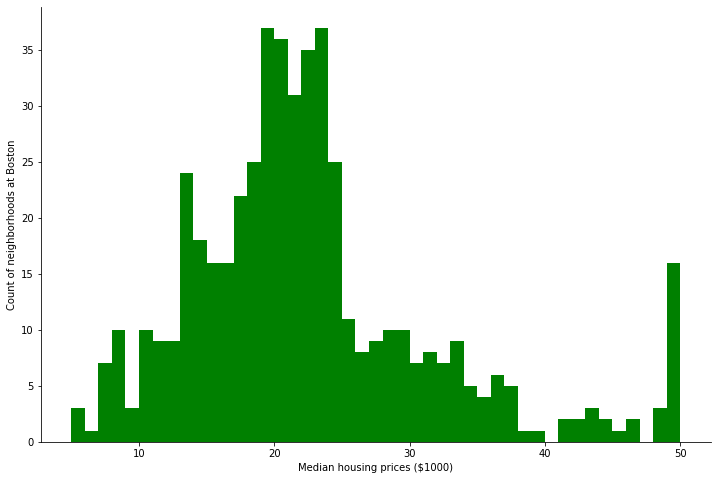

In [10]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
plt.figure(figsize=(12,8))

binwid = 1000/1000
plt.hist(bdata.target, 
         bins = np.arange(min(bdata.target), max(bdata.target) + binwid, binwid), 
         color = 'green', 
         edgecolor = "none")

plt.xlabel('Median housing prices ($1000)')
plt.ylabel('Count of neighborhoods at Boston')

axes = plt.subplot(111)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


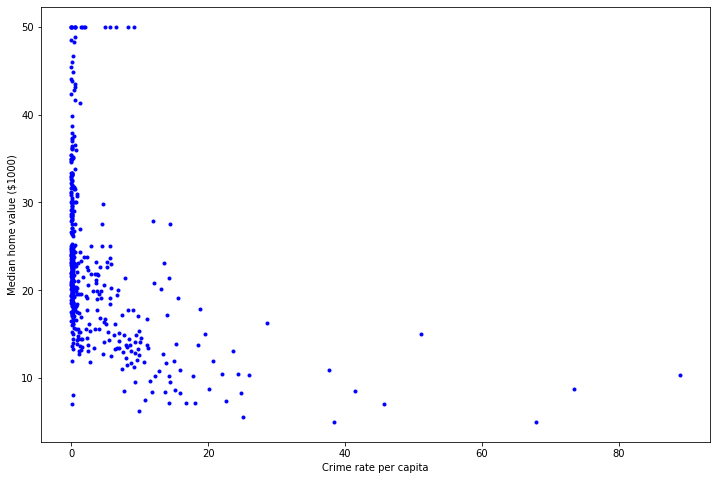

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(x=boston['CRIM'], y=boston['MEDV'], c='blue', marker = '.')
plt.xlabel('Crime rate per capita')
plt.ylabel('Median home value ($1000)')

plt.show()

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

*Write your thoughts here (1-2 paragraphs).*

From the scatter plot above, I find that most of the neighborhoods are concentrating in the interval where crime rates are about 0 to 20 per capita. These nighborhoods have home value vary from very low to the highest, especially all the expensive housing are in these interval. This is pretty much in line with common sense: expensive housing are usually located in relatively safe neighborhoods, or safe neighborhoods are usually associated with expensive housing. When crime rates rise above 20 per capita, the housing price is around 10,000 USD, at the bottom segment of all housing price range across Boston. This is also in line with common sense: housing in unsafe neighborhoods tend to be associated with lower housing price. 

There seems to be some correlation when we draw the downward trendline in the graph. Using the result from the correlation matrix below in 2.4, we find that the coefficient between CRIM and MEDV is 0.39. I think we cannot justify a causal relation with the given evidence. In my opinion, the causes of high housing price are multifacets, including school quality, safety, accessibility, etc. The causes of high crime rates is easier to understand, mostly the police effectiveness, which can be due to public budget and other reasons. Since rich people pay more taxes to fill the public budget, and so police tend to have more budget to operate and effective, the crime rates are likely to be lower. So the causal relation going from crime rate to housing price is not justified. It can just be correlation.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

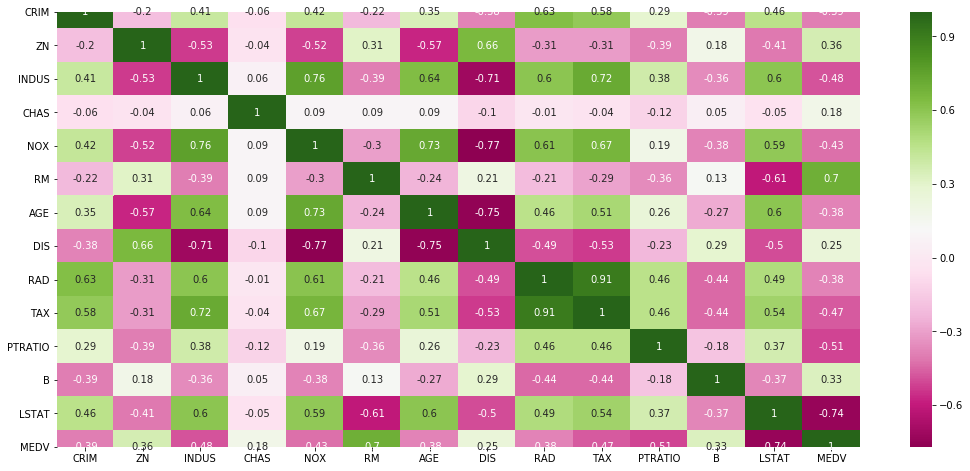

In [12]:
import seaborn as sns

plt.figure(figsize=(18,8))
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True, cmap="PiYG")

plt.show()

*Write your response here.*

The most positive correlated variables are TAX (full-value property-tax rate per $10,000) and RAD (index of accessibility to radial highways). It means that one unit of tax rate increase is correlated with 0.91 increase of the index of accessibility, holding other factors constant.

The most negative correlated variables are DIS (weighted distances to five Boston employment centres) and NOX (nitric oxides concentration by ppm).It means that one unit of decreased distances to employment centres is correlated with 0.71 ppm increased in NOx concentration. 

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

<Figure size 1296x1296 with 0 Axes>

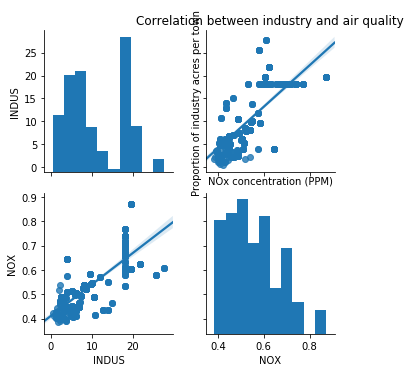

In [13]:
# Pairplots can show the correlation observation for each pair of the two data,
# and each of the distribution are respectively shown in diagonal of the matrix.

plt.figure(figsize=(18,18))
regr_data = boston.loc[:, ['INDUS','NOX']] # y-axis INDUS, x-axis NOX
sns.pairplot(regr_data, kind="reg")
plt.title('Correlation between industry and air quality')
plt.xlabel('NOx concentration (PPM)')
plt.ylabel('Proportion of industry acres per town ')
plt.show()

Interpretation: It could be the case that higher proportion of industry in the area can lead to more NOx emissions. Or reversely, since industry may not be the only emission source of NOx (e.g. diesel cars), the atmospheric air quality in that area is not very good intentionally for urban planning reason perhaps, and so industry is then intentionally permitted to locate more in that area. The correlation can be explained in many different ways, and when we reverse the axises, there can be new insights to develop. The distribution histograms also provide some information regarding each variable.